# __In this notebook we have tried to do a study of the ML algorithms like k-means clustering(unsupervised learning), Neural Networks. We have also tried to implement a End to End ML pipeline and have created a small gradio app for POC__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import files
# uploaded = files.upload()

# __1: Work on the following dataset diabetes.csv__

### __a) Find the optimum number of principal components for the features in the above-mentioned data__

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# X = diabetes_df.iloc[:, :-1]
X = diabetes_df[diabetes_df.columns[:-1]]
# Standardize the features
sscaler = StandardScaler()
X_scaled = sscaler.fit_transform(X)

# Apply PCA from sklearn...
pca = PCA()
pca.fit(X_scaled)

# Calculating the cumulative variance for all the principal component...
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


for i, var in enumerate(cumulative_variance):
    print(f"Principal Component {i+1}: {var:.4f} cumulative explained variance")

Principal Component 1: 0.2618 cumulative explained variance
Principal Component 2: 0.4782 cumulative explained variance
Principal Component 3: 0.6069 cumulative explained variance
Principal Component 4: 0.7163 cumulative explained variance
Principal Component 5: 0.8116 cumulative explained variance
Principal Component 6: 0.8970 cumulative explained variance
Principal Component 7: 0.9494 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


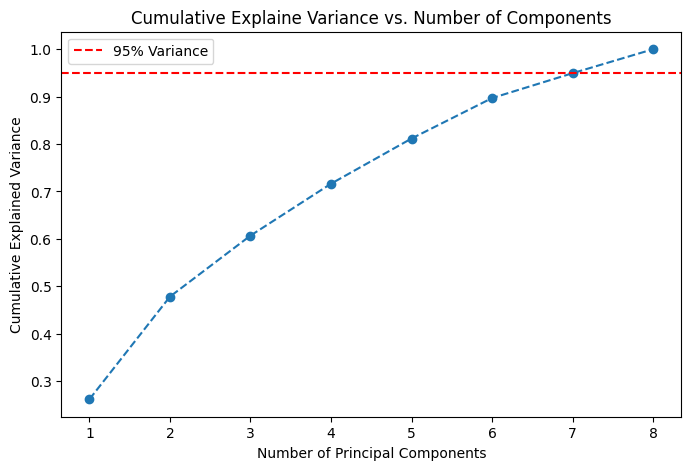

In [8]:
# Scree plot to determine the optimum number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explaine Variance vs. Number of Components")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()
plt.show()

#### __So here we are applying Principal Component Analysis to extract the optimum number of principal components and plotting a Scree plot to determine the number of principal components. We notice from the above graph that 7 components are optimal as they cross the 95% variance mark__

### __b) Use any two regression models of your choice and find the prediction accuracy and error between the reduced data (with an optimum number of principal components) and the complete data__

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=101)

In [11]:
pca_with_components = PCA(n_components=7)
X_train_pca = pca_with_components.fit_transform(X_train)
X_test_pca = pca_with_components.transform(X_test)

In [12]:
print(f"X train shape ---> {X_train.shape}")
print(f"X test shape ---> {X_test.shape}")
print(f"y train shape ---> {y_train.shape}")
print(f"y test shape ---> {y_test.shape}")
print(f"X train PCA shape ---> {X_train_pca.shape}")
print(f"X test PCA shape ---> {X_test_pca.shape}")

X train shape ---> (514, 8)
X test shape ---> (254, 8)
y train shape ---> (514,)
y test shape ---> (254,)
X train PCA shape ---> (514, 7)
X test PCA shape ---> (254, 7)


#### As we already know the number of Principal Components to be 7, we choose two models, Logistic Regressor and RandomForestRegressor

In [13]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [14]:
lr1 = LogisticRegression()
lr2 = LogisticRegression()
rfr1 = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=101)
rfr2 = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=101)

In [15]:
# Training on full dataset
lr1.fit(X_train, y_train)
rfr1.fit(X_train, y_train)

#Training on reduced dataset
lr2.fit(X_train_pca, y_train)
rfr2.fit(X_train_pca, y_train)

RandomForestRegressor(max_depth=2, n_estimators=200, random_state=101)

In [16]:
#Predict on full data
lr1_prediction_full_data = lr1.predict(X_test)
rfr1_prediction_full_data = rfr1.predict(X_test)

#Predict on reduced dataset
lr2_prediction_reduced_data = lr2.predict(X_test_pca)
rfr2_prediction_reduced_data = rfr2.predict(X_test_pca)

In [17]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [18]:
def evaluate_model_metrics(y_true, y_pred, model_name):
    if y_pred.dtype != int and y_pred.dtype != bool:  # Check if predictions are continuous
        y_pred = (y_pred >= 0.5).astype(int)
    print(f"-----{model_name} Performance-----")
    print(f"Accuracy Score: {accuracy_score(y_true=y_true, y_pred=y_pred)} | R2 Score: {r2_score(y_true=y_true, y_pred=y_pred)} | MSE: {mean_squared_error(y_true=y_true, y_pred=y_pred)} | MAE: {mean_absolute_error(y_true=y_true, y_pred=y_pred)}")
    print()

# Full Data Model Performance
evaluate_model_metrics(y_test, lr1_prediction_full_data, 'Logistic Regression(Full Data)')
evaluate_model_metrics(y_test, rfr1_prediction_full_data, 'Random Forest Regression(Full Data)')


#Reduced Data Model Performance
evaluate_model_metrics(y_test, lr2_prediction_reduced_data, 'Logistic Regression(Reduced Data)')
evaluate_model_metrics(y_test, rfr2_prediction_reduced_data, 'Random Forest Regression(Reduced Data)')

-----Logistic Regression(Full Data) Performance-----
Accuracy Score: 0.7755905511811023 | R2 Score: 0.003510220937435471 | MSE: 0.22440944881889763 | MAE: 0.22440944881889763

-----Random Forest Regression(Full Data) Performance-----
Accuracy Score: 0.7519685039370079 | R2 Score: -0.10138344001651878 | MSE: 0.24803149606299213 | MAE: 0.24803149606299213

-----Logistic Regression(Reduced Data) Performance-----
Accuracy Score: 0.7677165354330708 | R2 Score: -0.03145433271388254 | MSE: 0.23228346456692914 | MAE: 0.23228346456692914

-----Random Forest Regression(Reduced Data) Performance-----
Accuracy Score: 0.7165354330708661 | R2 Score: -0.2587239314474501 | MSE: 0.28346456692913385 | MAE: 0.28346456692913385



#### __Comparison Report after displaying accuracy and error data of both models on full and reduced data:__
#### __1. Logistic Regression__
#### __Full Data__: Accuracy = 77.56%, R² = 0.0035
#### __Reduced Data__: Accuracy = 76.77%, R² = -0.0315
#### __Observation__: Slight drop in accuracy and R² after dimensionality reduction, indicating minor loss of predictive power.
#### __2. Random Forest Regression__
#### __Full Data__: Accuracy = 75.20%, R² = -0.1014
#### __Reduced Data__: Accuracy = 71.65%, R² = -0.2587
#### __Observation__: Significant drop in accuracy and R², suggesting that Random Forest struggles more with reduced features.

#### __Logistic Regression performs relatively stable after PCA. Random Forest Regression loses more accuracy and predictive power after PCA, indicating that feature reduction negatively impacts its performance.__

# __2: We will use the fashion-MNIST dataset for this part. Flatten and preprocess the data (if required). It will become a 784-dimensional data with 10 classes.__

### __a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.__

> Add blockquote



In [19]:
train_mnist_fashion_df = pd.read_csv('fashion-mnist_train.csv')
test_mnist_fashion_df = pd.read_csv('fashion-mnist_test.csv')

In [20]:
print(f"Train shape {train_mnist_fashion_df.shape}", f"Test shape {test_mnist_fashion_df.shape}")

Train shape (60000, 785) Test shape (10000, 785)


In [21]:
train_mnist_fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [22]:
train_mnist_fashion_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_mnist_fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [24]:
train_mnist_fashion_df.describe().loc[["min", "max"], : ]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.0,16.0,36.0,226.0,164.0,227.0,230.0,224.0,255.0,254.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,170.0


In [25]:
pixelCols = train_mnist_fashion_df.columns[1:] #Selecting columns other than 'label'
train_mnist_fashion_df[pixelCols] = train_mnist_fashion_df[pixelCols] / 255 #Scaling the pixel data between 0 and 1

In [26]:
train_mnist_fashion_df.describe().loc[["min", "max"], : ]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,9.0,0.062745,0.141176,0.886275,0.643137,0.890196,0.901961,0.878431,1.0,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.666667


In [27]:
random_indices = np.random.choice(train_mnist_fashion_df.shape[0], size=10, replace=False)
random_indices

array([12139,  4143, 15072, 35538, 15646, 46677, 59319, 36415,  4271,
       52414], dtype=int32)

In [28]:
X_train = train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values
initial_centroids = X_train[random_indices]
initial_centroids

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.71372549, 0.38823529,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
from sklearn.cluster import KMeans

In [30]:
kMeans = KMeans(
    n_clusters=10,
    init=initial_centroids,
    max_iter=300,
    random_state=101)

kMeans.fit(train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]])

KMeans(init=array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.71372549, 0.38823529,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]),
       n_clusters=10, random_state=101)

In [31]:
kMeans.labels_

array([2, 7, 2, ..., 9, 9, 1], dtype=int32)

In [32]:
unique, counts = np.unique(kMeans.labels_, return_counts=True)

for item , cnt in zip(unique, counts):
    print(f"Cluster {item} contains {cnt} data points\n")

Cluster 0 contains 7761 data points

Cluster 1 contains 6598 data points

Cluster 2 contains 9955 data points

Cluster 3 contains 3380 data points

Cluster 4 contains 7816 data points

Cluster 5 contains 3805 data points

Cluster 6 contains 7471 data points

Cluster 7 contains 5381 data points

Cluster 8 contains 5187 data points

Cluster 9 contains 2646 data points



#### Now just for the sake of cluster visualization we shall perform dimensionality reduction using PCA to convert the 784 pixels(dimensions) into 2D.

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca_mnist = PCA(n_components=2)
X_pca = pca_mnist.fit_transform(train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values)
cluster_centers_pca= pca_mnist.transform(kMeans.cluster_centers_)

In [35]:
X_pca.shape

(60000, 2)

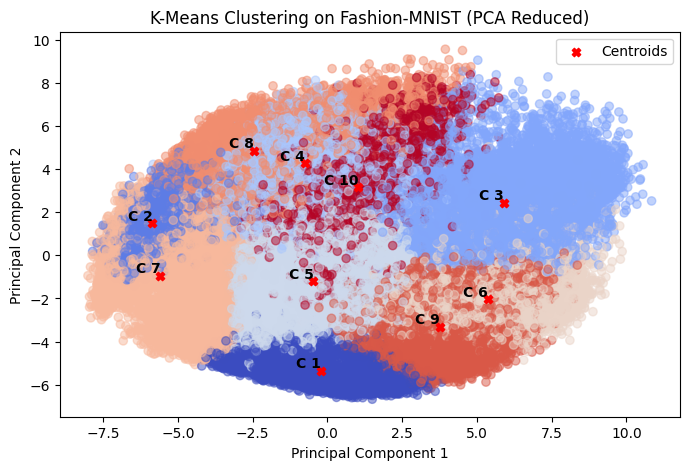

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kMeans.labels_, cmap='coolwarm',alpha=0.5)
plt.scatter(cluster_centers_pca[:,0], cluster_centers_pca[:,1], color='red', marker='X',label='Centroids')

for idx, (x, y) in enumerate(cluster_centers_pca):
    plt.text(
        x,
        y,
        f"C {idx + 1}",
        fontsize=10,
        color='black',
        ha='right',
        va='bottom',
        fontweight='bold'
    )


plt.title("K-Means Clustering on Fashion-MNIST (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### __b) Visualize the cluster centers of each cluster as 2D images of all clusters.__

In [37]:
kMeans.cluster_centers_

array([[-1.06726151e-19,  9.08019319e-19,  4.28259858e-18, ...,
         1.68268177e-16,  1.04083409e-16,  7.37257477e-18],
       [-9.52912066e-20,  5.04831637e-19,  3.38813179e-18, ...,
        -5.72458747e-17,  5.94142791e-17,  6.83047369e-18],
       [ 3.15143637e-06,  1.96964773e-05,  1.41814636e-04, ...,
         2.52871254e-02,  3.66945372e-03,  2.34782009e-04],
       ...,
       [-8.08916465e-20, -9.14795583e-20,  2.00577402e-18, ...,
         2.33209805e-05,  7.65219673e-05,  4.08117159e-05],
       [ 1.20966065e-05,  1.20966065e-05,  3.62898196e-05, ...,
         5.29226535e-05,  7.56037908e-06,  8.31641699e-06],
       [ 5.92829724e-06,  1.14119722e-04,  5.89865576e-04, ...,
         3.42611119e-02,  1.43909416e-02,  1.73106280e-03]])

In [38]:
def visualize_cluster_centers(centers, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, ax in enumerate(axes.flat):
        # Reshape the cluster center from 784 to 28x28
        center_image = centers[i].reshape(28, 28)

        # Display the image
        ax.imshow(center_image, cmap='gray')
        ax.set_title(f'Cluster {i}')
        ax.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

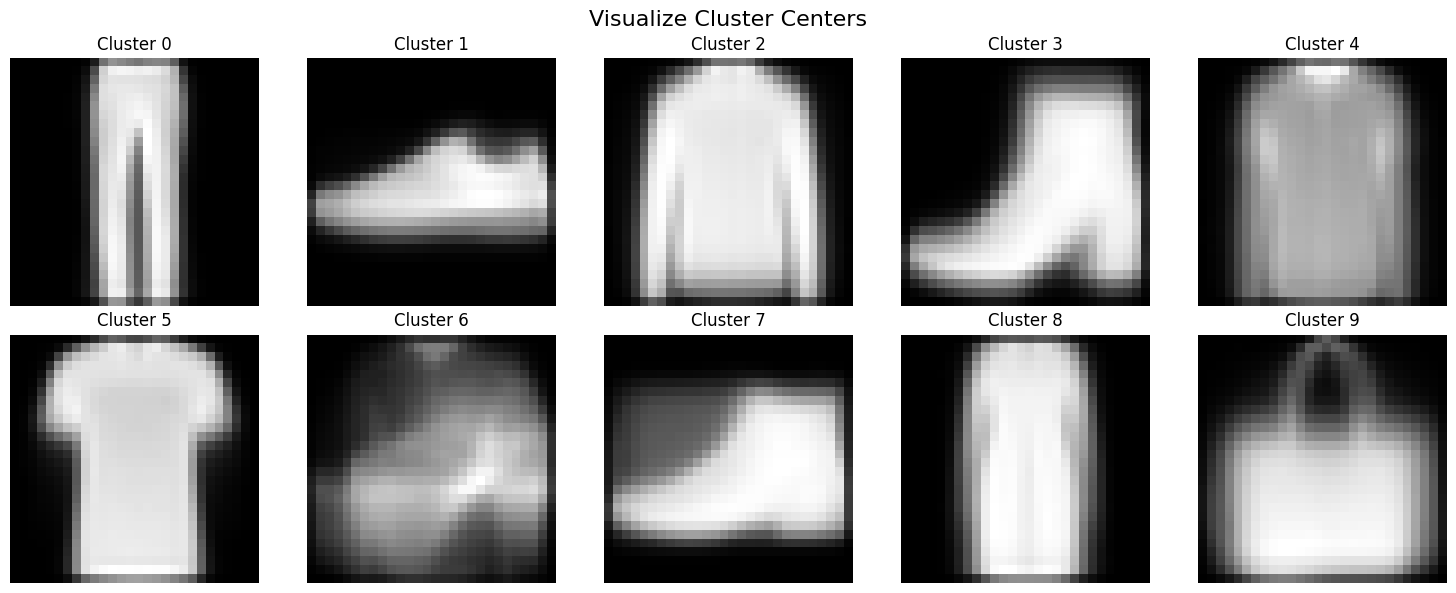

In [39]:
visualize_cluster_centers(kMeans.cluster_centers_, "Visualize Cluster Centers")

### __c) Visualize 10 images corresponding to each cluster.__

In [40]:
def select_random_images_from_clusters(n_images = 10):
    random_imgs_in_cluster = {i: np.where(kMeans.labels_ == i)[0][:n_images] for i in range(0, 10)} # getting indices of 10 images per cluster
    plt.figure(figsize=(10, 2))
    dataset = train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values
    for cluster_id, first_10_indices in random_imgs_in_cluster.items():
        fig, axes = plt.subplots(1, 10, figsize=(15, 3))
        for i, (idx, ax) in enumerate(zip(first_10_indices, axes.flat)):
            ax.imshow(dataset[idx].reshape(28, 28), cmap='gray')
            ax.set_title(f'C{cluster_id + 1}  Image {i + 1}')
            ax.axis('off')
        plt.suptitle(f"Cluster {cluster_id + 1}")
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

<Figure size 1000x200 with 0 Axes>

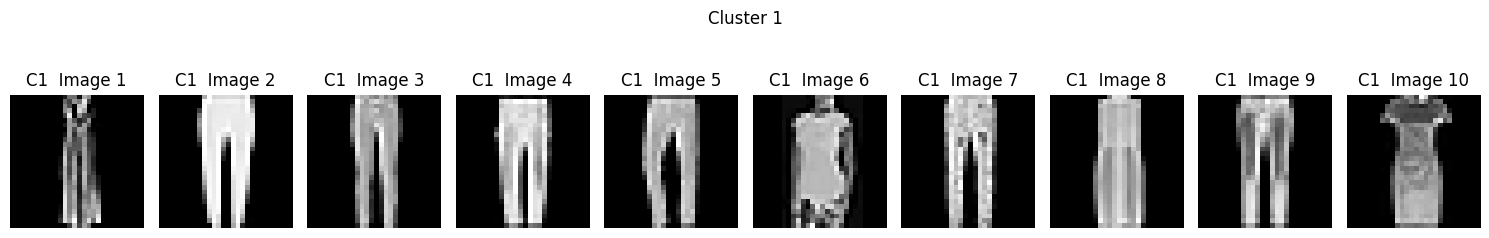

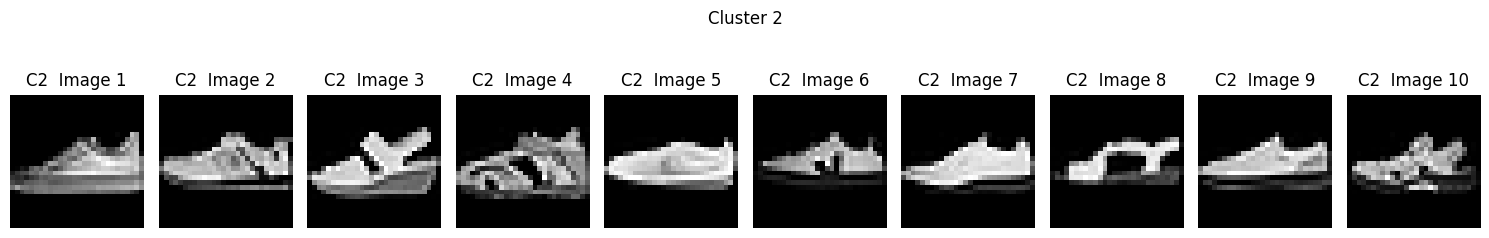

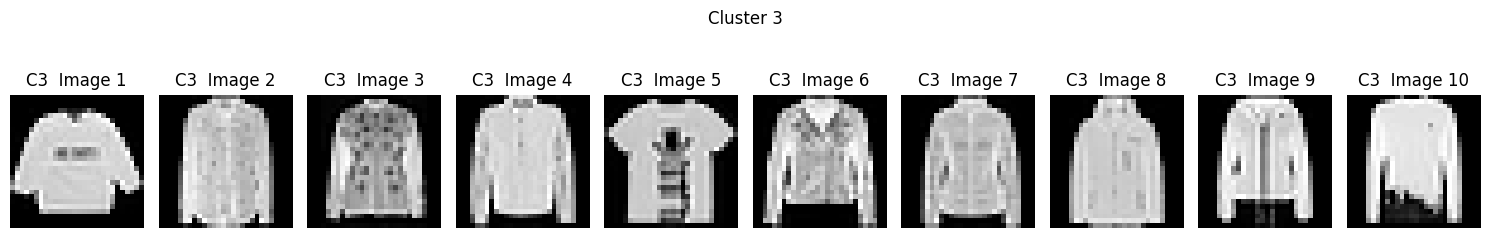

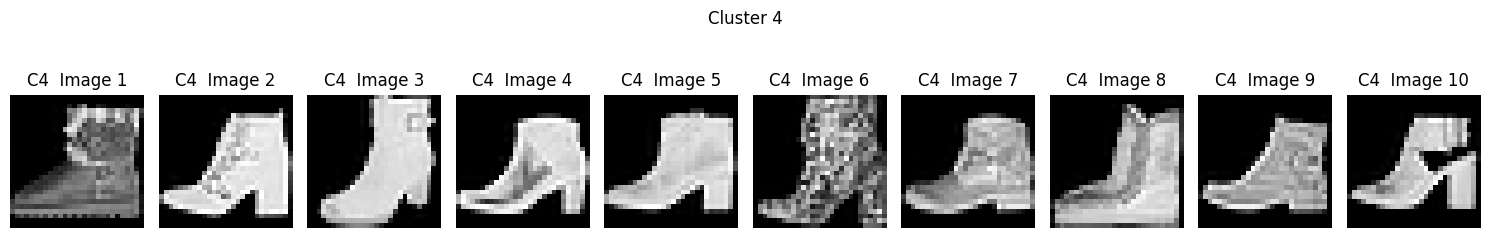

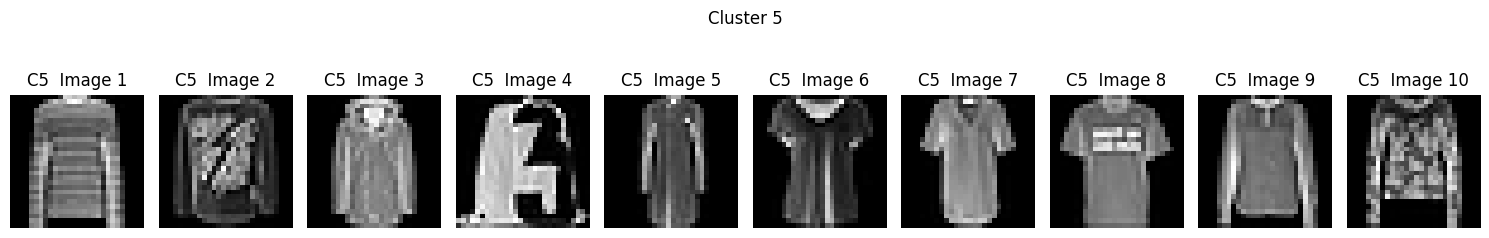

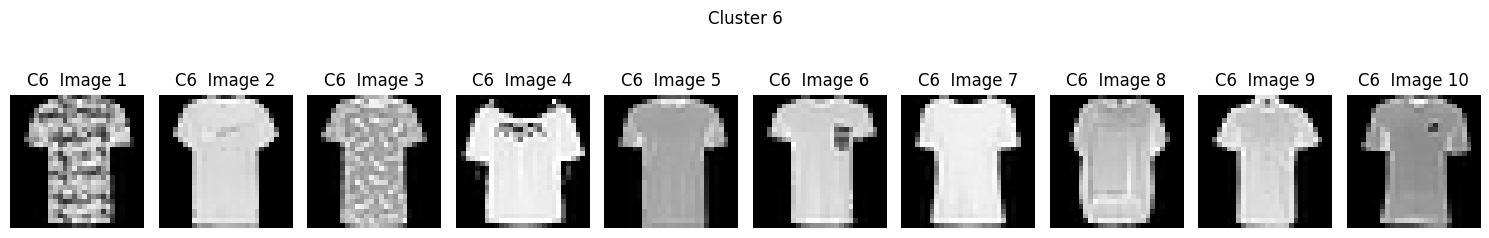

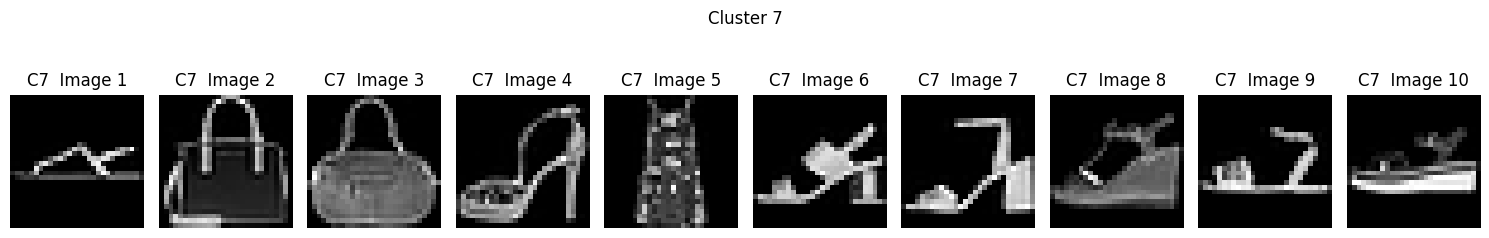

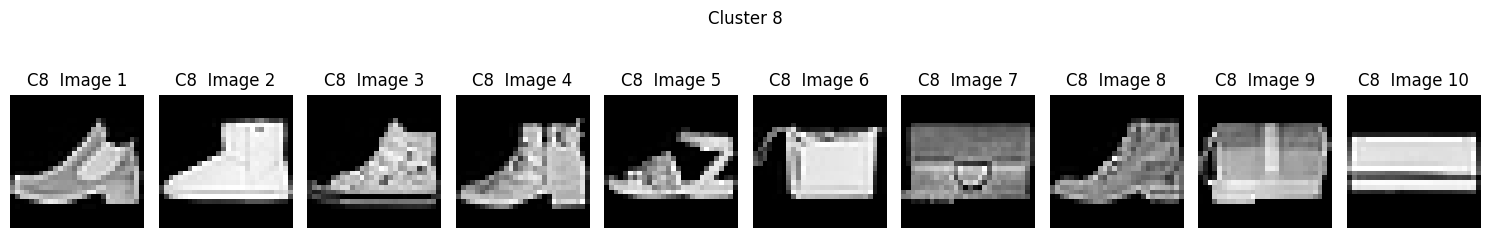

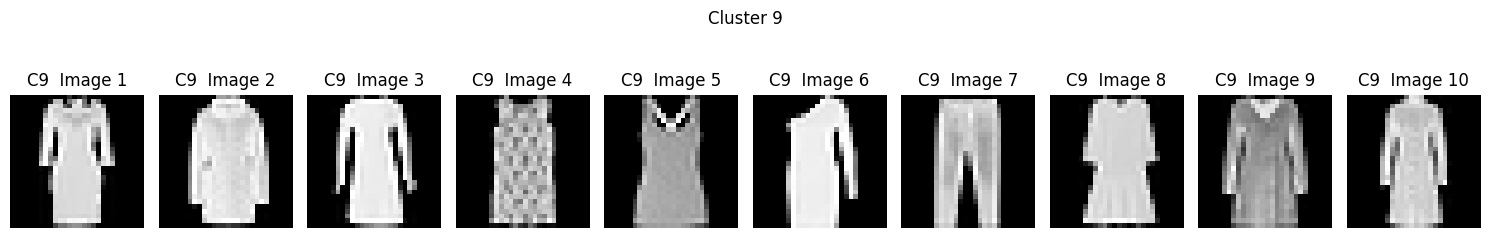

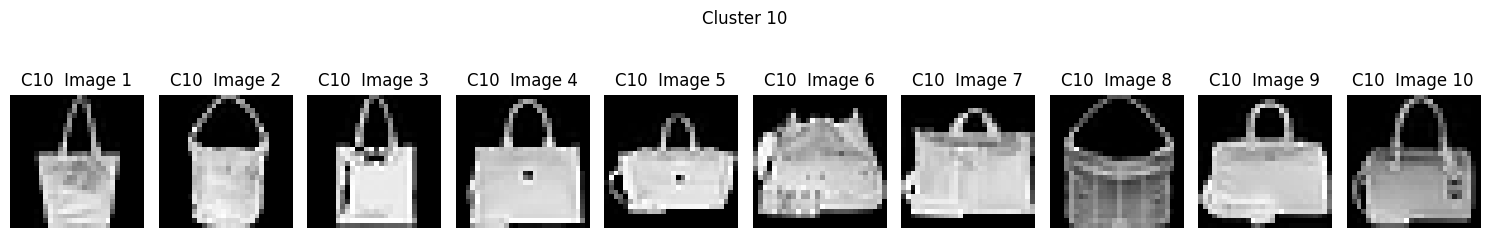

In [41]:
select_random_images_from_clusters(10)

### __d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.__

In [42]:
label_df = train_mnist_fashion_df[train_mnist_fashion_df.columns[0:1]].values
for class_label in range(10):
    class_indices = np.where(label_df == class_label)[0]
    index_per_class = np.random.choice(class_indices, 10, replace=False)

In [43]:
initial_centroids_second_iter = train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values[index_per_class]
initial_centroids_second_iter

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
kMeans_second_iter = KMeans(n_clusters=10, init=initial_centroids_second_iter, max_iter=300, random_state=101)
kMeans_second_iter.fit(train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]])

KMeans(init=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       n_clusters=10, random_state=101)

In [45]:
kMeans_second_iter.labels_

array([4, 7, 3, ..., 2, 4, 1], dtype=int32)

In [46]:
unique, counts = np.unique(kMeans_second_iter.labels_, return_counts=True)

for item , cnt in zip(unique, counts):
    print(f"Cluster {item} contains {cnt} data points\n")

Cluster 0 contains 2270 data points

Cluster 1 contains 3920 data points

Cluster 2 contains 8249 data points

Cluster 3 contains 9416 data points

Cluster 4 contains 3502 data points

Cluster 5 contains 7660 data points

Cluster 6 contains 7423 data points

Cluster 7 contains 3385 data points

Cluster 8 contains 9045 data points

Cluster 9 contains 5130 data points



#### Now again for the sake of visualization we shall perform dimensionaltiy reduction from 784 dimensions to 2D

In [47]:
pca_mnist_second_iter = PCA(n_components=2)
X_pca_second_iter = pca_mnist_second_iter.fit_transform(train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values)
cluster_centers_pca_second_iter = pca_mnist_second_iter.transform(kMeans_second_iter.cluster_centers_)

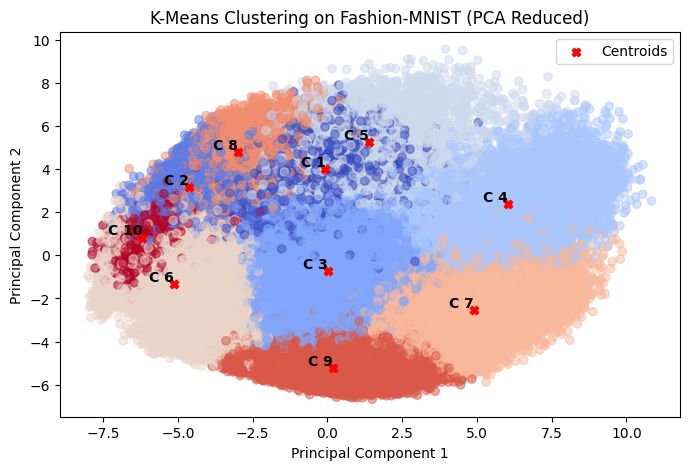

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca_second_iter[:,0], X_pca_second_iter[:,1], c=kMeans_second_iter.labels_, cmap='coolwarm',alpha=0.5)
plt.scatter(cluster_centers_pca_second_iter[:,0], cluster_centers_pca_second_iter[:,1], color='red', marker='X',label='Centroids')

for idx, (x, y) in enumerate(cluster_centers_pca_second_iter):
    plt.text(
        x,
        y,
        f"C {idx + 1}",
        fontsize=10,
        color='black',
        ha='right',
        va='bottom',
        fontweight='bold'
    )


plt.title("K-Means Clustering on Fashion-MNIST (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#### __e) Visualize 10 images corresponding to each cluster.__

In [49]:
def select_random_images_from_clusters_second_iter(n_images = 10):
    random_imgs_in_cluster = {i: np.where(kMeans_second_iter.labels_ == i)[0][:n_images] for i in range(0, 10)} # getting indices of 10 images per cluster
    plt.figure(figsize=(10, 2))
    dataset = train_mnist_fashion_df[train_mnist_fashion_df.columns[1:]].values
    for cluster_id, first_10_indices in random_imgs_in_cluster.items():
        fig, axes = plt.subplots(1, 10, figsize=(15, 3))
        for i, (idx, ax) in enumerate(zip(first_10_indices, axes.flat)):
            ax.imshow(dataset[idx].reshape(28, 28), cmap='gray')
            ax.set_title(f'C{cluster_id + 1}  Image {i + 1}')
            ax.axis('off')
        plt.suptitle(f"Cluster {cluster_id + 1}")
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

<Figure size 1000x200 with 0 Axes>

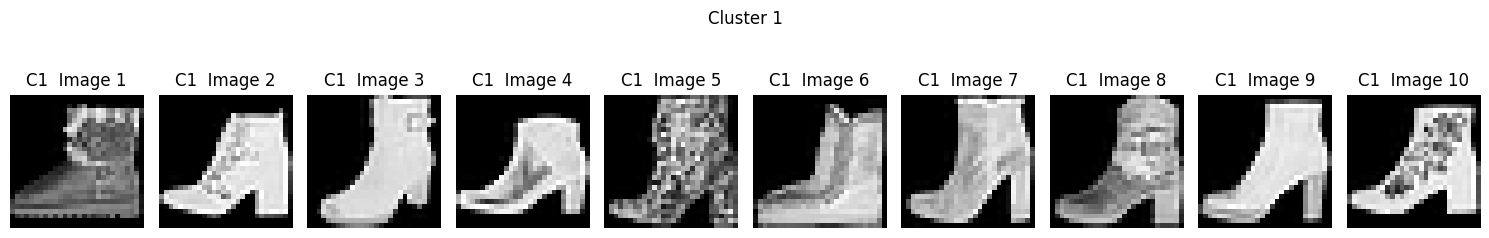

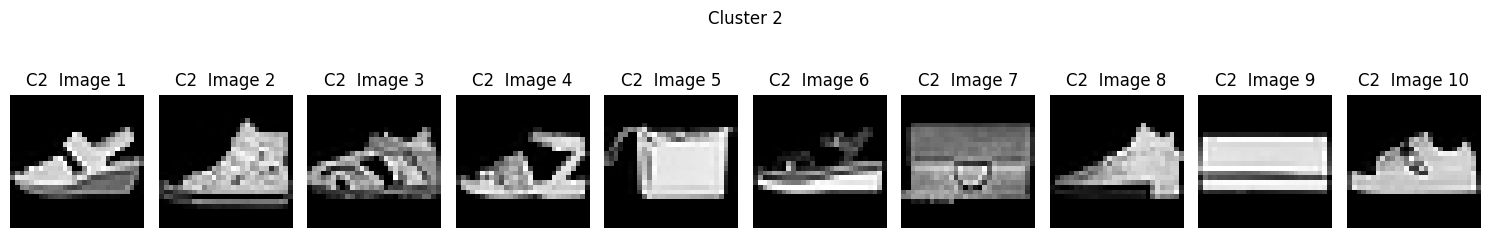

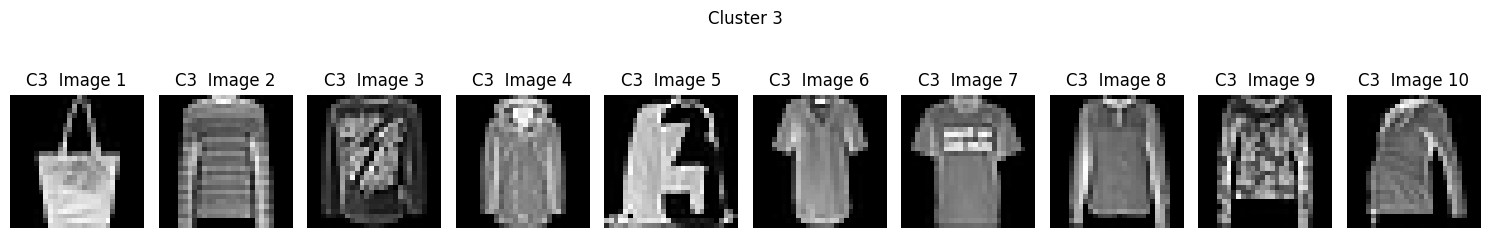

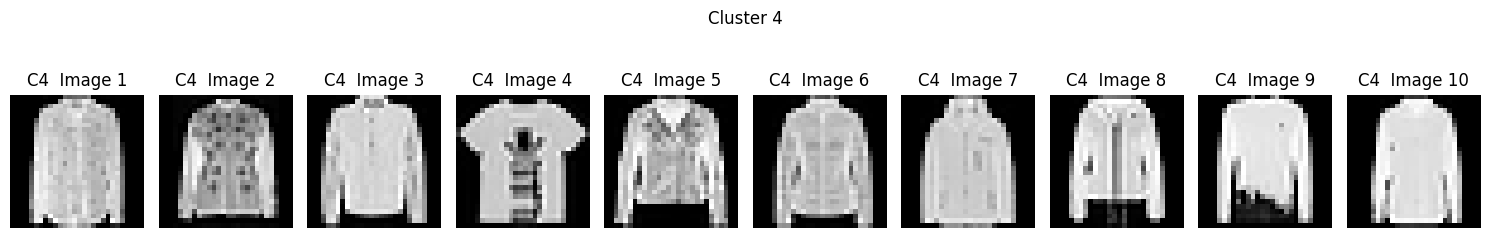

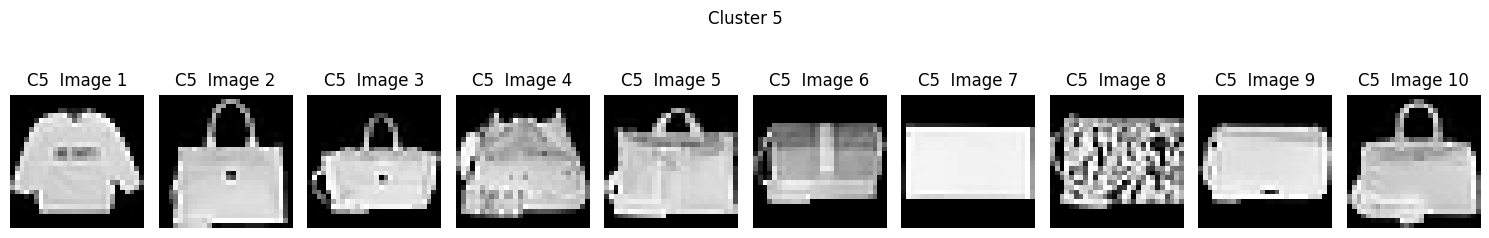

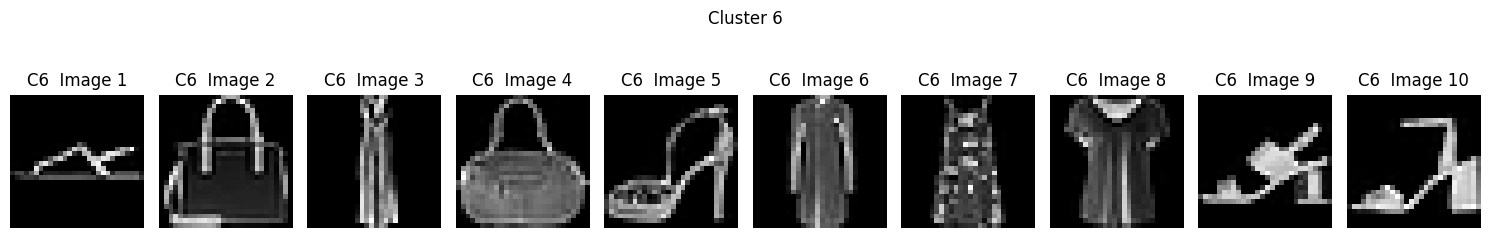

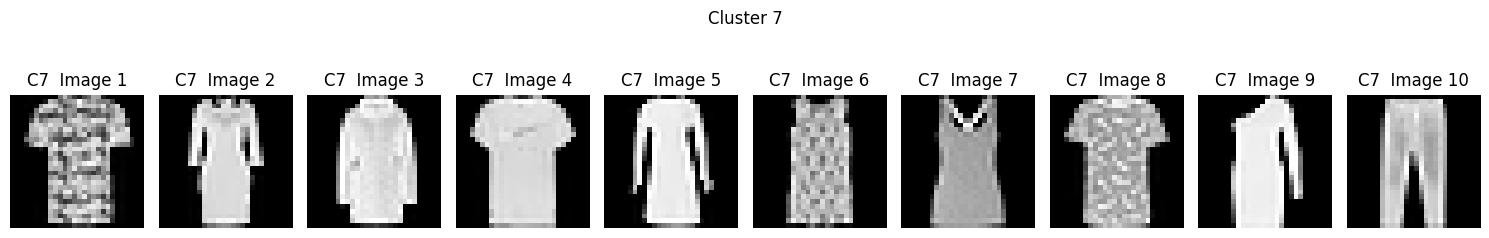

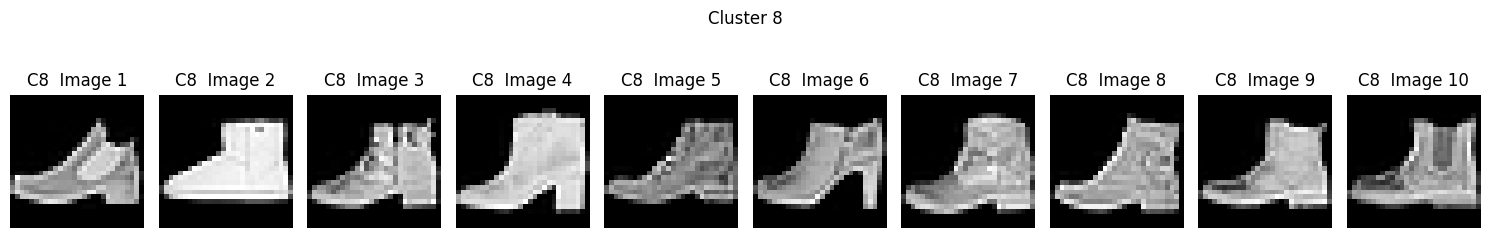

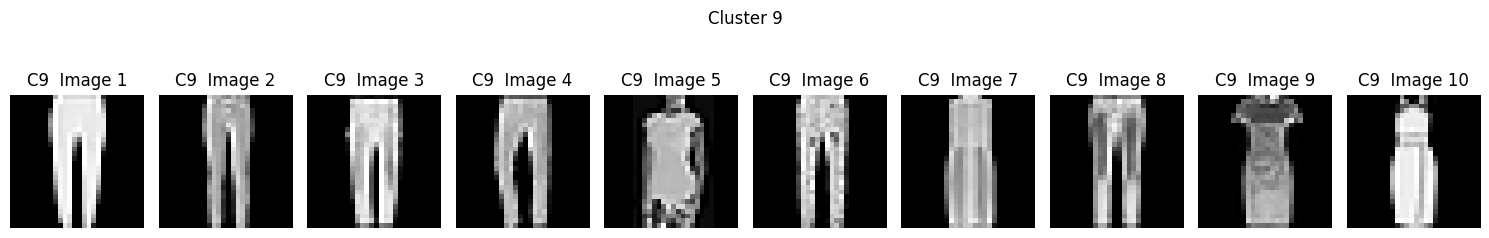

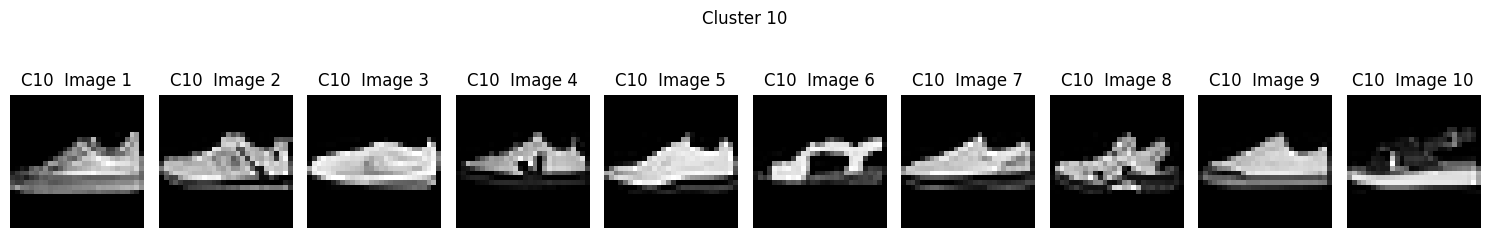

In [50]:
select_random_images_from_clusters_second_iter(10)

### __f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering.__

![SSE_ss.png](attachment:409f3e1f-c664-467d-a317-02d11f0b6590.png)

In [51]:
inertia_part_a = kMeans.inertia_
inertia_part_d = kMeans_second_iter.inertia_


print(f"SSE Part a: {inertia_part_a} and SSE part d: {inertia_part_d}")

SSE Part a: 1921650.86936535 and SSE part d: 1944242.2392486515


#### __So from the above Scores we see that in Part A the SSE is > SSE in Part D which indicates that data points are closer to cluster centroids in Part D. This was expected as in part D we were taking images from each class instead of poor random initializations. Part A, which used purely random points, resulted in a slightly higher SSE, indicating that the clustering might be less stable.__

# __3: Implementation of Neural Networks from Scratch Using NumPy and Comparison with Sklearn__

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### __a) Load and preprocess the MNIST Digits Dataset.__

In [53]:
def load_mnist():
    try:
        # Try loading via OpenML
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
        X = X / 255.0
        y = y.astype(int)
        return train_test_split(X, y, test_size=0.2, random_state=42)
    except Exception as e:
        print(f"OpenML failed: {str(e)}. Using Keras fallback...")
        # Load via Keras if OpenML fails
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
        X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_mnist()

In [54]:
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (56000, 784)
Training labels shape: (56000,)
Test data shape: (14000, 784)
Test labels shape: (14000,)


### __b) Implement a neural network with one input layer, one hidden layer, and one output layer using NumPy.__

In [55]:
def initialize_parameters(input_size, hidden_size, output_size):
    params = {
        'W1': np.random.randn(input_size, hidden_size) * 0.01,
        'b1': np.zeros((1, hidden_size)),
        'W2': np.random.randn(hidden_size, output_size) * 0.01,
        'b2': np.zeros((1, output_size))
    }
    return params

### __Activation functions: Sigmoid and Softmax__

In [56]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
  exps = np.exp(x - np.max(x, axis=1, keepdims=True))
  return exps / np.sum(exps, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)


def sigmoid_derivative(x):
  return x*(1-x)

### __Forward propagation Implementation__

In [57]:
def forward_propagation(X, params):
    z1 = np.dot(X, params['W1']) + params['b1']
    a1 = relu(z1)
    z2 = np.dot(a1, params['W2']) + params['b2']
    a2 = softmax(z2)
    return a1, a2

In [58]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    y_true_onehot = np.eye(10)[y_true]
    return -np.sum(y_true_onehot * np.log(y_pred + 1e-8)) / m

In [59]:
def backpropagation(X, y, a1, a2, params):
    m = X.shape[0]
    y_onehot = np.eye(10)[y]

    # Output layer gradient
    dz2 = a2 - y_onehot
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    # Hidden layer gradient
    dz1 = np.dot(dz2, params['W2'].T) * (a1 > 0)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

In [60]:
def gradient_descent(params, grads, lr):
    params['W1'] -= lr * grads['dW1']
    params['b1'] -= lr * grads['db1']
    params['W2'] -= lr * grads['dW2']
    params['b2'] -= lr * grads['db2']
    return params

### __c) Train the neural network with various hyperparameters (e.g., learning rate, number of hidden nodes). Implementation of function__

In [61]:
def train_nn(X_train, y_train, X_val, y_val, hidden_size=128, lr=0.1, epochs=20, batch_size=128):
    input_size = X_train.shape[1]
    output_size = 10
    params = initialize_parameters(input_size, hidden_size, output_size)
    np.random.seed(42)

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(len(X_train))
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]

        epoch_loss = 0

        # Mini-batch training
        for i in range(0, len(X_train), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Forward pass
            a1, a2 = forward_propagation(X_batch, params)

            # Loss calculation
            batch_loss = compute_loss(y_batch, a2)
            epoch_loss += batch_loss

            # Backward pass
            grads = backpropagation(X_batch, y_batch, a1, a2, params)
            params = gradient_descent(params, grads, lr)

        # Validation metrics
        _, y_pred_train = forward_propagation(X_train, params)
        # print(f"{y_pred_train}")
        train_acc = accuracy_score(y_train, np.argmax(y_pred_train, axis=1))
        train_loss = compute_loss(y_train, y_pred_train)

        _, y_pred_val = forward_propagation(X_val, params)
        val_loss = compute_loss(y_val, y_pred_val)
        val_acc = accuracy_score(y_val, np.argmax(y_pred_val, axis=1))

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        if (epoch+1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

    return params, train_losses, val_losses, train_accs, val_accs

### __c) Train the neural network with various hyperparameters (e.g., learning rate, number of hidden nodes) Execution of function__

In [62]:
for hidden_size in [64, 128, 256]:
    for lr in [0.01, 0.1]:
        print(f"\nTraining with hidden_size={hidden_size}, lr={lr}")
        params, *metrics = train_nn(X_train, y_train, X_test, y_test,
                                  hidden_size=hidden_size, lr=lr, epochs=20)



Training with hidden_size=64, lr=0.01
Epoch 5/20 | Train Loss: 0.5021 | Val Acc: 0.8684
Epoch 10/20 | Train Loss: 0.3555 | Val Acc: 0.9011
Epoch 15/20 | Train Loss: 0.3089 | Val Acc: 0.9112
Epoch 20/20 | Train Loss: 0.2805 | Val Acc: 0.9186

Training with hidden_size=64, lr=0.1
Epoch 5/20 | Train Loss: 0.1888 | Val Acc: 0.9414
Epoch 10/20 | Train Loss: 0.1172 | Val Acc: 0.9574
Epoch 15/20 | Train Loss: 0.0875 | Val Acc: 0.9624
Epoch 20/20 | Train Loss: 0.0686 | Val Acc: 0.9659

Training with hidden_size=128, lr=0.01
Epoch 5/20 | Train Loss: 0.4713 | Val Acc: 0.8769
Epoch 10/20 | Train Loss: 0.3489 | Val Acc: 0.9024
Epoch 15/20 | Train Loss: 0.3072 | Val Acc: 0.9114
Epoch 20/20 | Train Loss: 0.2806 | Val Acc: 0.9194

Training with hidden_size=128, lr=0.1
Epoch 5/20 | Train Loss: 0.1788 | Val Acc: 0.9441
Epoch 10/20 | Train Loss: 0.1076 | Val Acc: 0.9617
Epoch 15/20 | Train Loss: 0.0772 | Val Acc: 0.9677
Epoch 20/20 | Train Loss: 0.0564 | Val Acc: 0.9714

Training with hidden_size=256, 

In [63]:
def sklearn_comparison(X_train, y_train, X_val, y_val, hidden_size=128, lr=0.1, epochs=20):
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation='relu',
        learning_rate_init=lr,
        solver='sgd',
        alpha=0.0,
        batch_size=128,
        random_state=42
    )
    train_acc = []
    val_acc = []
    # test_acc = []

    # Warm start for epoch-by-epoch tracking
    mlp.warm_start = True
    mlp.max_iter = 1

    for epoch in range(epochs):
        mlp.fit(X_train, y_train)
        train_acc.append(mlp.score(X_train, y_train))
        val_acc.append(mlp.score(X_val, y_val))
        # test_acc.append(mlp.score(X_test,y_test))

        if (epoch+1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]:.4f} | Val Acc: {val_acc[-1]:.4f}")

    test_acc = mlp.score(X_test, y_test)
    return train_acc, val_acc, test_acc

In [64]:
params, train_loss, val_loss, train_acc, val_acc = train_nn(X_train, y_train, X_test, y_test, hidden_size=128, lr=0.1, epochs=20)

Epoch 5/20 | Train Loss: 0.1788 | Val Acc: 0.9441
Epoch 10/20 | Train Loss: 0.1076 | Val Acc: 0.9617
Epoch 15/20 | Train Loss: 0.0772 | Val Acc: 0.9677
Epoch 20/20 | Train Loss: 0.0564 | Val Acc: 0.9714


### __d) Evaluate the performance of the neural network on the testing set.__

In [65]:
_, y_pred_test = forward_propagation(X_test, params)
test_acc = accuracy_score(y_test, np.argmax(y_pred_test, axis=1))
print(f"\nTest Accuracy (NumPy): {test_acc:.4f}")


Test Accuracy (NumPy): 0.9714


### __e) Implement the same neural network using sklearn and compare the results with the NumPy implementation__

In [66]:
import warnings
warnings.filterwarnings('ignore')

sklearn_train_acc, sklearn_val_acc, sklearn_test_acc = sklearn_comparison(
    X_train, y_train, X_test, y_test, epochs=20)

Epoch 5/20 | Train Acc: 0.9895 | Val Acc: 0.9724
Epoch 10/20 | Train Acc: 0.9928 | Val Acc: 0.9724
Epoch 15/20 | Train Acc: 0.9951 | Val Acc: 0.9725
Epoch 20/20 | Train Acc: 0.9997 | Val Acc: 0.9768


In [67]:
print(f"Manual Numpy Implementation test accuracy : {test_acc:.4f} | sklearn Implementation test accuracy: {sklearn_test_acc:.4f}")

Manual Numpy Implementation test accuracy : 0.9714 | sklearn Implementation test accuracy: 0.9768


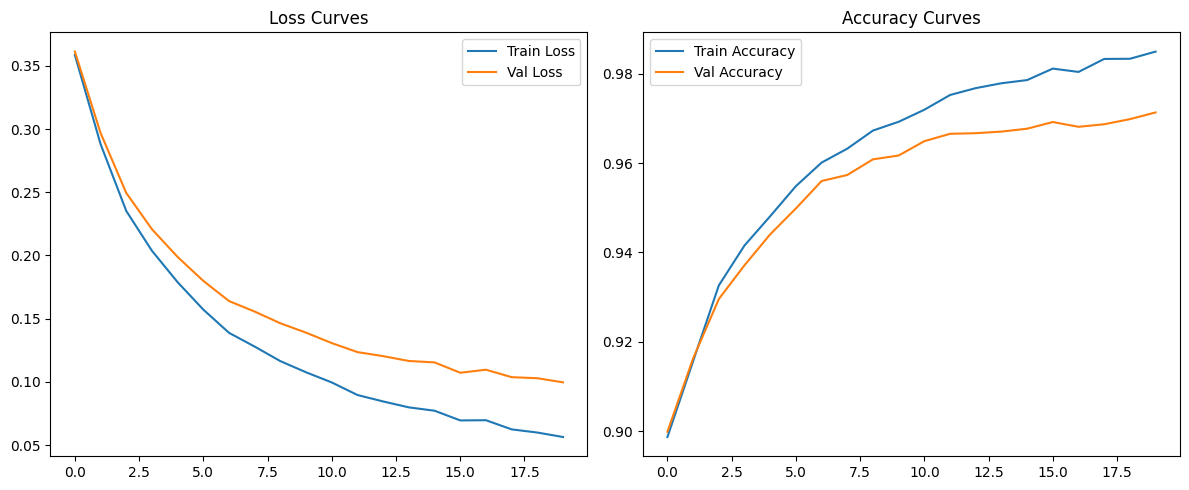

In [68]:
def plot_curves(train_loss, val_loss, train_acc, val_acc):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_curves(train_loss, val_loss, train_acc, val_acc)

In [69]:
def plot_comparison(numpy_train_acc, numpy_val_acc, sklearn_train_acc, sklearn_val_acc, epochs):
    plt.figure(figsize=(12, 6))

    # NumPy curves
    plt.plot(epochs, numpy_train_acc, 'b-', label='NumPy Train Accuracy')
    plt.plot(epochs, numpy_val_acc, 'b--', label='NumPy Val Accuracy')

    # Scikit-learn curves
    plt.plot(epochs, sklearn_train_acc, 'r-', label='Sklearn Train Accuracy')
    plt.plot(epochs, sklearn_val_acc, 'r--', label='Sklearn Val Accuracy')

    plt.title('Accuracy Comparison: Custom vs Scikit-learn NN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


### __f) Plot the training and validation loss/accuracy curves (for both experiments)__

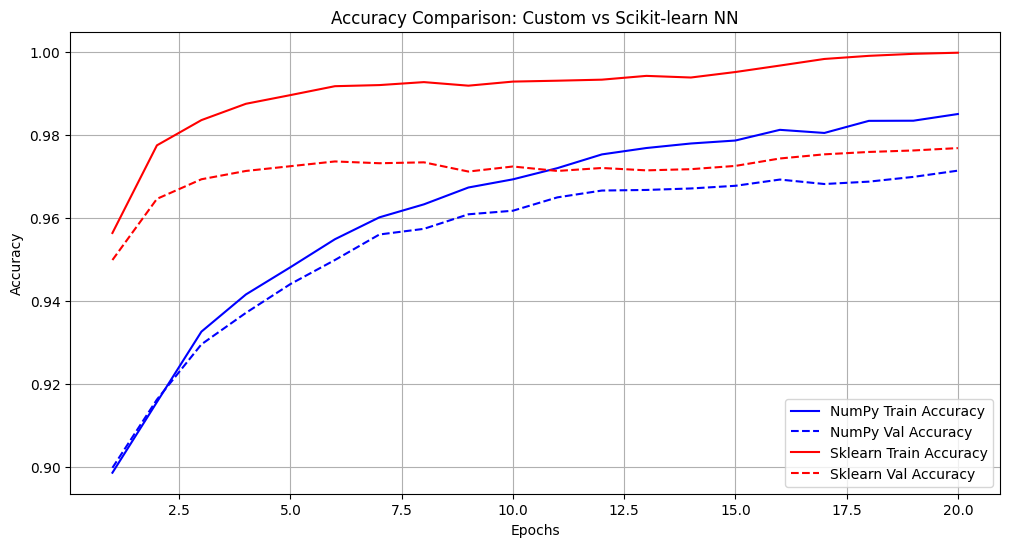

In [70]:
epochs_range = list(range(1, 21))
plot_comparison(train_acc, val_acc,
                sklearn_train_acc, sklearn_val_acc,
                epochs_range)

# __Part 2: Project Part__

## __4: Selecting a project and implementing a complete end-to-end machine learning pipeline for the same. Also, a demo has been prepared using gradio/streamlit for POC.__

### __Here we shall work on the Titanic Survivor Prediction__

In [71]:
titanic_df_train = pd.read_csv('titanic_train.csv')
titanic_df_test = pd.read_csv('titanic_test.csv')

In [72]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
print('\nNull Values in Training \n{}'.format(titanic_df_train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(titanic_df_test.isnull().sum()))

print('\nDuplicated values in train {}'.format(titanic_df_train.duplicated().sum()))
print('Duplicated values in test {}'.format(titanic_df_test.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


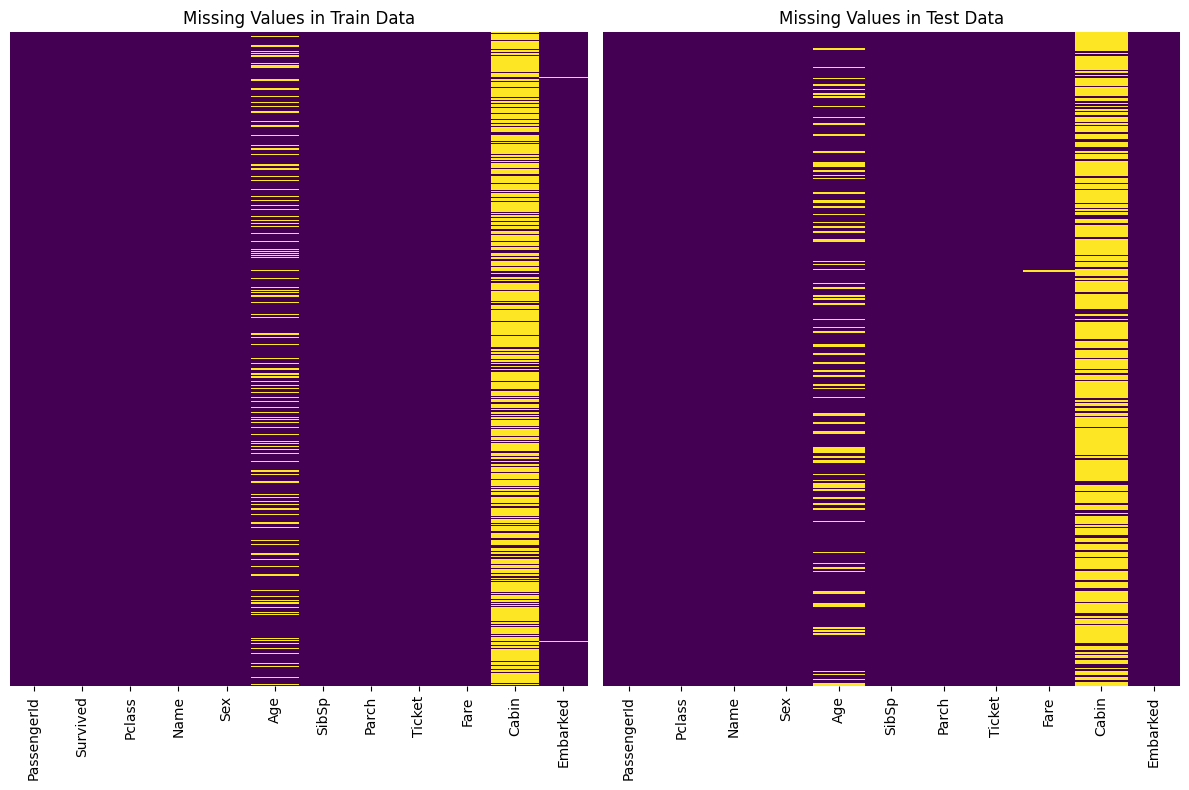

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot Heatmap for Train Dataset
sns.heatmap(titanic_df_train.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values in Train Data")

# Plot Heatmap for Test Dataset
sns.heatmap(titanic_df_test.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values in Test Data")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### From here we observe that almost all of the __Cabin__ values are missing, so it may be better to drop the column while in case of __Age__, we may be able to impute data based on some data analysis. Also two values for __Embarked__ in __Train Data__ and one value of __Fare__ in __Test Data__ is missing.


### So here for __Age__ we can find the Age of the people for each class and then impute the data accordingly.

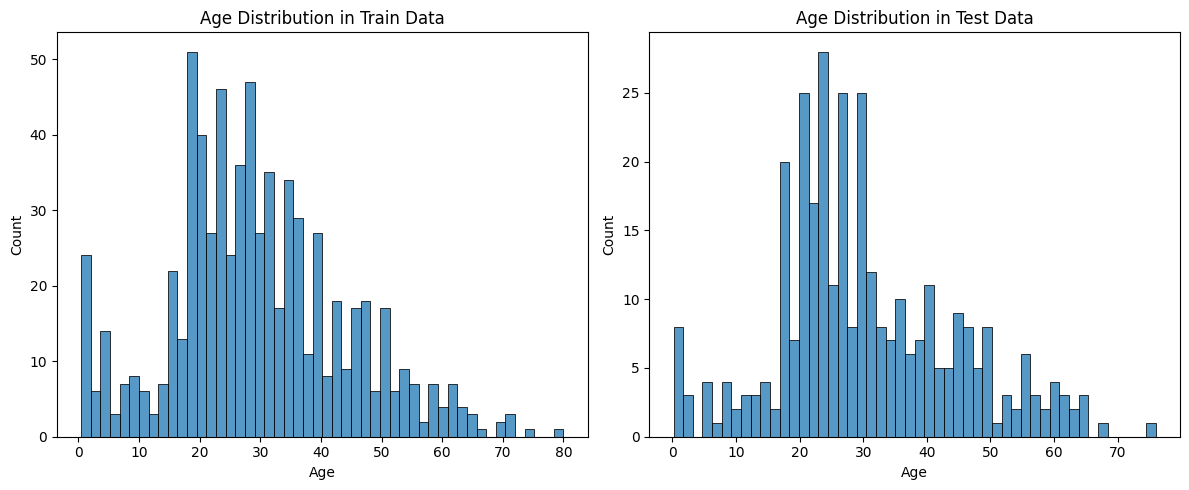

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot HistPlot for Train Dataset
sns.histplot(titanic_df_train['Age'].dropna(), bins=50, kde=False, ax=axes[0])
axes[0].set_title("Age Distribution in Train Data")

# Plot HistPlot for Test Dataset
sns.histplot(titanic_df_test['Age'].dropna(), bins=50, kde=False, ax=axes[1])
axes[1].set_title("Age Distribution in Test Data")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

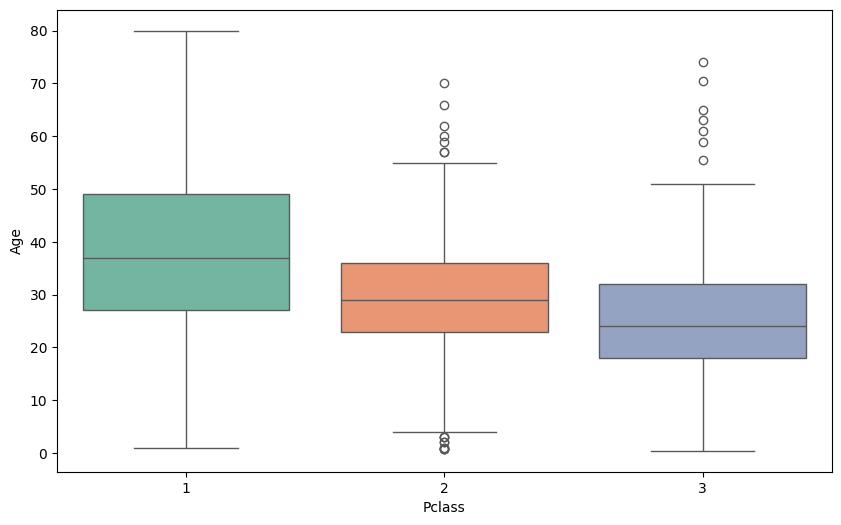

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic_df_train, x='Pclass', y='Age', hue='Pclass', legend=False, palette='Set2')

In [78]:
def impute_age(cols, mean_by_class):
    age = cols.iloc[0]
    p_class = cols.iloc[1]
    if pd.isnull(age):
        return mean_by_class[p_class]
    return age


In [79]:
titanic_df_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [80]:
mean_by_class_train = titanic_df_train.groupby('Pclass')['Age'].mean()
mean_by_class_test = titanic_df_test.groupby('Pclass')['Age'].mean()
titanic_df_train['Age'] = titanic_df_train[['Age', 'Pclass']].apply(impute_age, axis=1, args=(mean_by_class_train,))
titanic_df_test['Age'] = titanic_df_test[['Age', 'Pclass']].apply(impute_age, axis=1, args=(mean_by_class_test,))

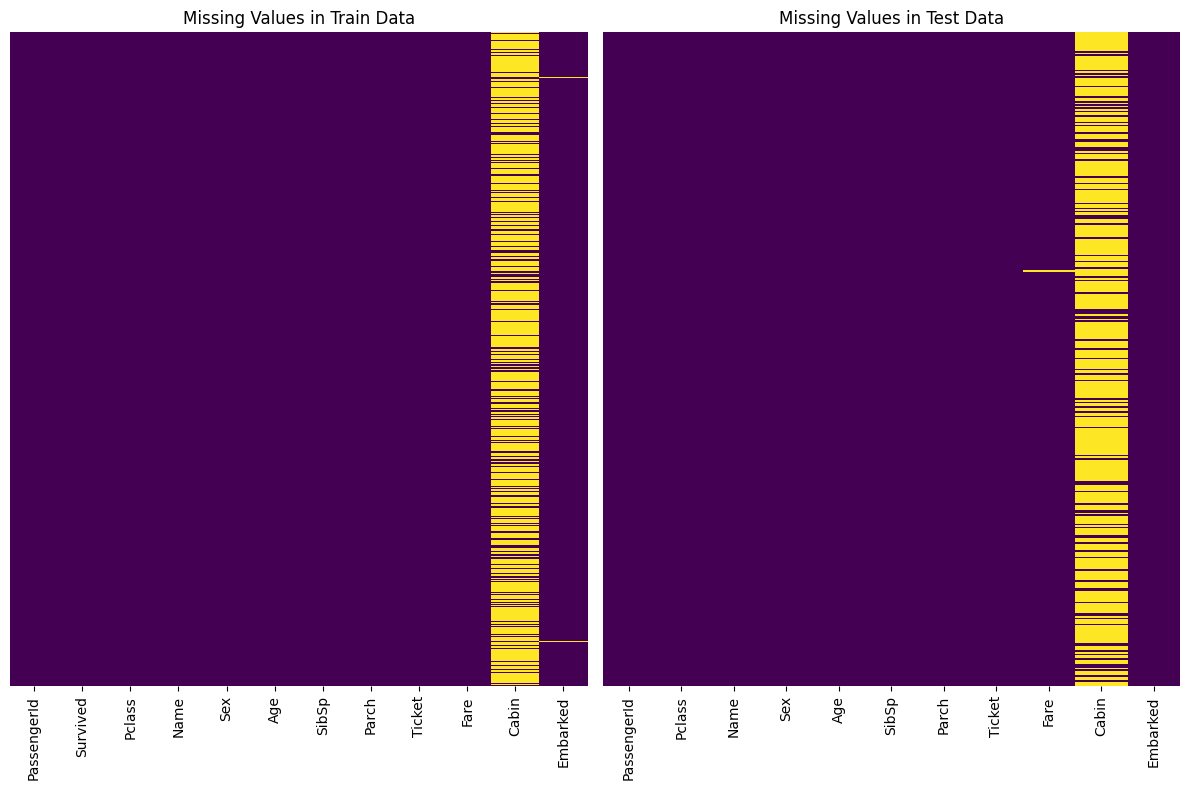

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot Heatmap for Train Dataset
sns.heatmap(titanic_df_train.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values in Train Data")

# Plot Heatmap for Test Dataset
sns.heatmap(titanic_df_test.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values in Test Data")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [82]:
titanic_df_train.drop('Cabin', axis=1, inplace=True)
titanic_df_test.drop('Cabin', axis=1, inplace=True)

In [83]:
titanic_df_train.dropna(inplace=True)
titanic_df_test.dropna(inplace=True)

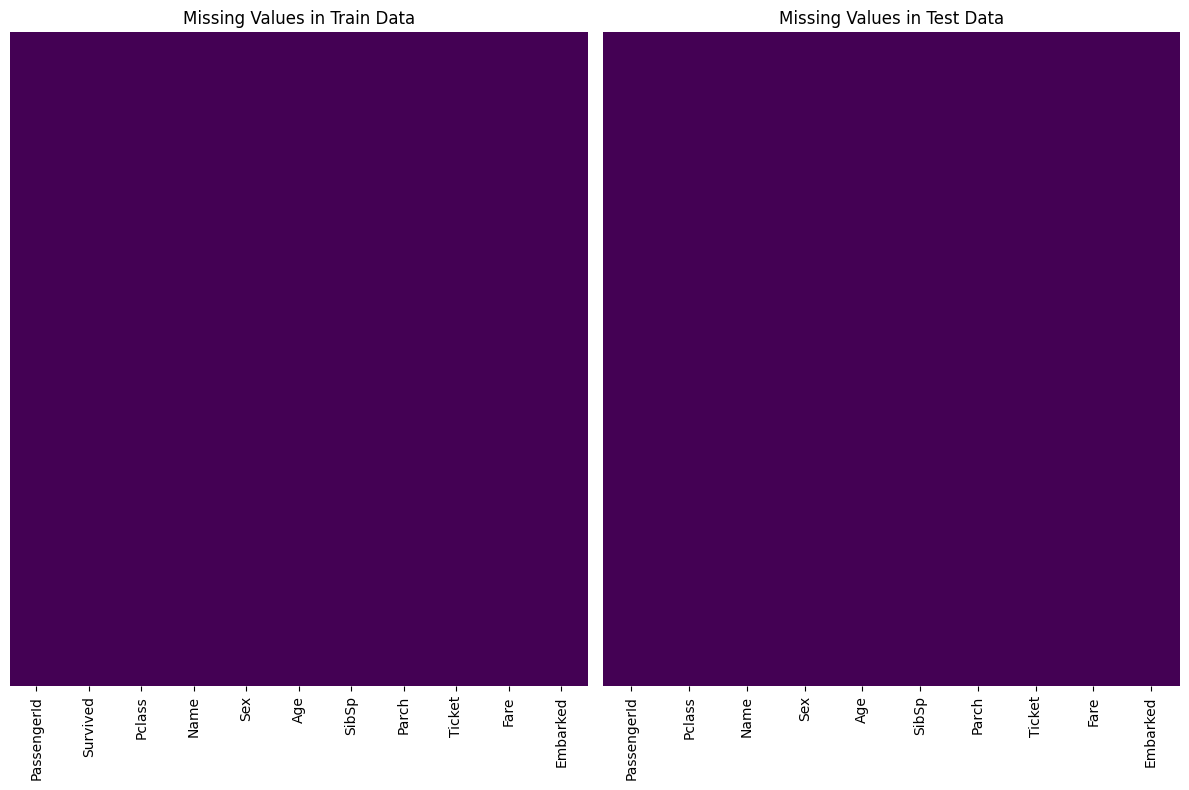

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot Heatmap for Train Dataset
sns.heatmap(titanic_df_train.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title("Missing Values in Train Data")

# Plot Heatmap for Test Dataset
sns.heatmap(titanic_df_test.isnull(), cmap="viridis", cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title("Missing Values in Test Data")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Survival Count on Titanic')

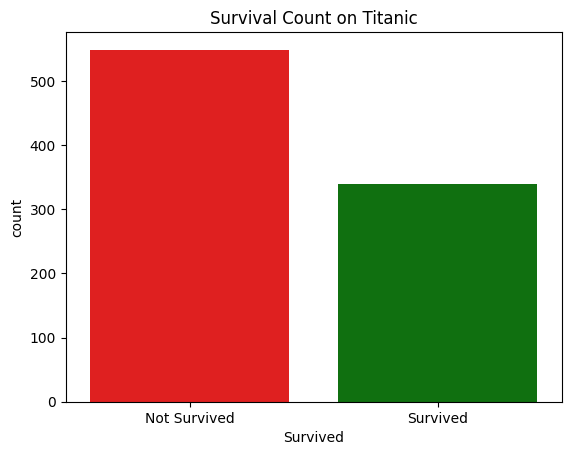

In [85]:
sns.countplot(titanic_df_train, x='Survived', hue='Survived',  legend=False,  palette=['red', 'green'])
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.title("Survival Count on Titanic")

Text(0.5, 1.0, 'Survival Count By Gender')

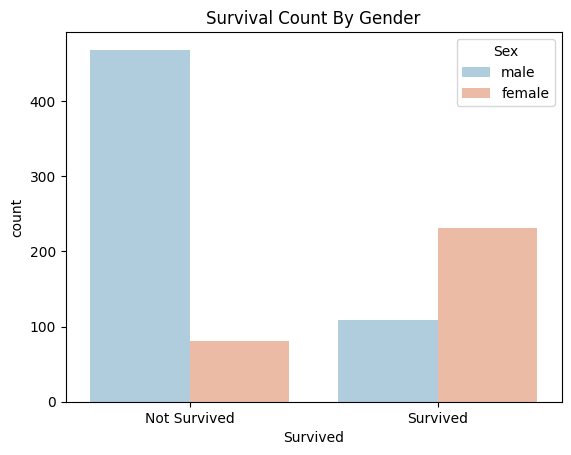

In [86]:
# Survival Based on Gender
sns.countplot(titanic_df_train, x='Survived', hue='Sex', palette='RdBu_r')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.title("Survival Count By Gender")

Text(0.5, 1.0, 'Survival Count By Class')

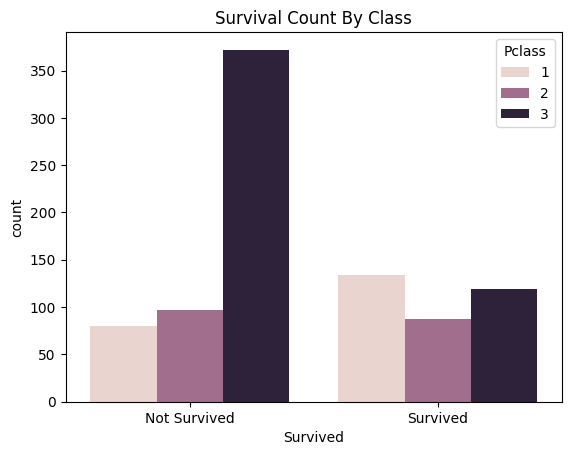

In [87]:
sns.countplot(titanic_df_train, x='Survived', hue='Pclass')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.title("Survival Count By Class")

### __Now after imputation, we can see various unuseful columns like Name, Ticket, PassengerId. Also there are some categorical columns like Sex and Embarked Wherein we can do encoding for the same__

In [88]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [90]:
Gender = pd.get_dummies(titanic_df_train['Sex'], dtype='int', drop_first=True)
Gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [91]:
Gender_test = pd.get_dummies(titanic_df_test['Sex'], dtype='int', drop_first=True)
Gender_test.head()

,male
0,1
1,0
2,1
3,1
4,0


In [92]:
Embarked_Encoded = pd.get_dummies(titanic_df_train['Embarked'], dtype='int', drop_first=True)
Embarked_Encoded.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [93]:
Embarked_Encoded_test = pd.get_dummies(titanic_df_test['Embarked'], dtype='int', drop_first=True)
Embarked_Encoded_test.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [94]:
titanic_df_train = pd.concat([titanic_df_train, Gender, Embarked_Encoded], axis=1)
titanic_df_test = pd.concat([titanic_df_test, Gender_test, Embarked_Encoded_test], axis=1)

In [95]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [96]:
titanic_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [97]:
titanic_df_train.drop(['Sex', 'Embarked', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
titanic_df_test.drop(['Sex', 'Embarked','PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [98]:
titanic_df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [99]:
titanic_df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [100]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = 1 + i['SibSp'] + i['Parch']
        del i['SibSp']
        del i['Parch']
    return train, test

In [101]:
titanic_df, titanic_df_test = fam_size(titanic_df_train, titanic_df_test)

In [102]:
X_titanic = titanic_df_train.drop(['Survived'], axis=1)
X_test_titanic = titanic_df_test
y_titanic = titanic_df_train['Survived']

In [103]:
X_titanic.head()

,Pclass,Age,Fare,male,Q,S,Fam_Size
0,3,22.0,7.2500,1,0,1,2
1,1,38.0,71.2833,0,0,0,2
2,3,26.0,7.9250,0,0,1,1
3,1,35.0,53.1000,0,0,1,2
4,3,35.0,8.0500,1,0,1,1


In [104]:
y_titanic.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
X_train_titanic, X_val_titanic, y_train_titanic, y_val_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=101)

In [107]:
lg_titanic = LogisticRegression(max_iter=1000)

In [108]:
lg_titanic.fit(X_train_titanic, y_train_titanic)

LogisticRegression(max_iter=1000)

In [109]:
titanic_predictions = lg_titanic.predict(X_val_titanic)

In [110]:
print(f'Classification Report')
print(classification_report(y_true=y_val_titanic, y_pred=titanic_predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.65      0.74        71

    accuracy                           0.81       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



In [111]:
print(f'Confusion Matrix')
print(confusion_matrix(y_true=y_val_titanic, y_pred=titanic_predictions))

Confusion Matrix
[[99  8]
 [25 46]]


Text(0.5, 1.0, 'Confusion Matrix')

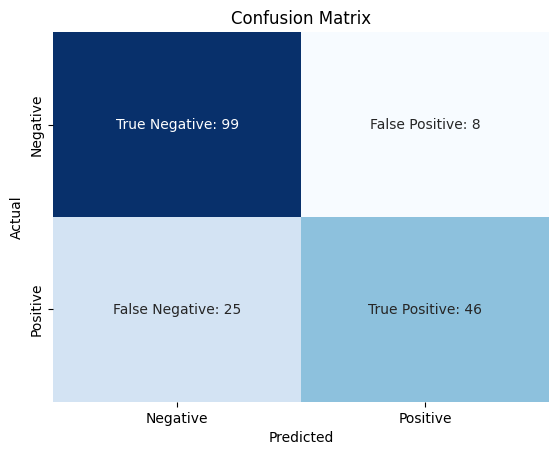

In [112]:
conf_matrix = confusion_matrix(y_val_titanic, titanic_predictions)
tn, fp, fn, tp = conf_matrix.ravel()

conf_matrix_labels = [[f'True Negative: {tn}', f'False Positive: {fp}'],
                     [f'False Negative: {fn}', f'True Positive: {tp}']]

sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt='', cbar=False, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
acc = accuracy_score(y_val_titanic, titanic_predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.8146067415730337


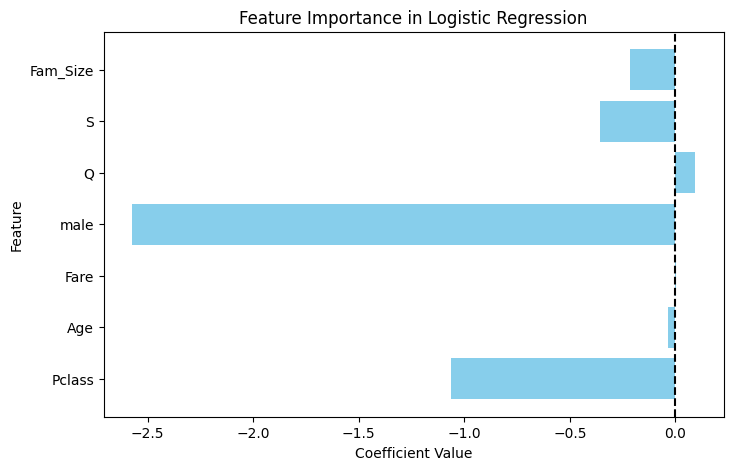

In [115]:
plt.figure(figsize=(8, 5))
plt.barh(X_train_titanic.columns, lg_titanic.coef_[0], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.axvline(x=0, color="black", linestyle="--")  # Reference line at 0
plt.show()

#### __Positive coefficients → Features that increase the probability of the positive class.__

#### __Negative coefficients → Features that decrease the probability of the positive class.__

#### __Larger absolute values → More significant features.__

In [116]:
final_prediction = lg_titanic.predict(X_test_titanic)

In [117]:
final_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### __Creating a Sample Gradio APP for the same. In this notebook section the local version of the gradio app has been made__
### __Here is the url of the hosted and running version of the app [Titanic Survival Prediction APP](https://huggingface.co/spaces/latentcoder/titanic-app-demo)__

In [118]:
!pip install gradio


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
import gradio as gr

def classify_survival(num):
    if num == 0:
        return "Sadly, the Passenger Did not Survive"
    else:
        return "Survived"

def survival_prediction(Pclass, Age, Fare, sex, Embarked, SiblingsNum, ParentNum):
    Q, S = 0, 0
    male = 0
    Fam_Size = 0
    if Age is None:
        if Pclass == 1:
            Age = 38
        elif Pclass == 2:
            Age = 30
        else:
            Age = 25

    if sex == "Male":
        male = 1
    else:
        male = 0

    if Embarked == "C":
        Q, S = 0, 0
    elif Embarked == "S":
        Q, S = 0, 1
    elif Embarked == "Q":
        Q,S = 1, 0

    Fam_Size = 1 + (SiblingsNum or 0) + (ParentNum or 0)

    input_df = pd.DataFrame(data=[[Pclass, Age, Fare, male, Q, S, Fam_Size]], columns=lg_titanic.feature_names_in_)
    prediction_with_gradio = lg_titanic.predict(input_df)
    output = classify_survival(prediction_with_gradio[0])

    if output == "Survived":
        return [("1", output)]
    else:
        return [("0", output)]


output = gr.HighlightedText(color_map={
    "Survived": "green",
    "Sadly, the Passenger Did not Survive": "red"
})

iface = gr.Interface(title= "Survival Prediction for Titanic Passengers",
    fn=survival_prediction,
    inputs=[
        gr.Dropdown([1, 2, 3], label="Passenger Class"),
        gr.Slider(minimum=1, maximum= 100, step=1, label="Select passenger's Age"),
        gr.Number(label="Enter Fare", minimum=0, maximum=600),
        gr.Dropdown(["Male", "Female"], label="Passenger Gender"),
        gr.Dropdown(["S", "C", "Q"], label="Embarked"),
        gr.Slider(minimum=0, maximum= 100, step=1, label="Number if Passenger's Siblings"),
        gr.Slider(minimum=0, maximum= 100, step=1, label="Number of Passenger's Parent")
    ],
    outputs=output,  theme="freddyaboulton/dracula_revamped"
)

iface.launch(share= True )


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
